In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
import plotly.express as px
import plotly.graph_objects as go
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
import warnings
warnings.filterwarnings('ignore') 
from wordcloud import WordCloud, STOPWORDS

In [176]:
df_u5m_rate=pd.read_csv("C:\\Users\\jaygo\\Downloads\\archve\\Under five mortality rate.csv", encoding='latin-1')
df_prop_un=pd.read_csv("C:\\Users\\jaygo\\Downloads\\archve\\Proportion of undernourished in the population.csv", encoding='latin-1')
df_preva_st_u5=pd.read_csv("C:\\Users\\jaygo\\Downloads\\archve\\Prevalence of stunting in children under five years.csv", encoding='latin-1')
df_preva_wa_u5=pd.read_csv("C:\\Users\\jaygo\\Downloads\\archve\\Prevalence of wasting in children under five years.csv", encoding='latin-1')
df_GHI2022=pd.read_csv("C:\\Users\\jaygo\\Downloads\\archve\\GHI2022 scores.csv", encoding='latin-1')

In [177]:
print(df_u5m_rate.head())
print(df_u5m_rate.info())

       Country  2000  2007  2014  2022
0  Afghanistan  12.9  10.0   7.4   5.8
1      Albania   2.7   1.7   1.0   1.0
2      Algeria   4.0   3.1   2.5   2.3
3       Angola  20.4  14.7   9.3   7.1
4    Argentina   2.0   1.6   1.2   0.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  136 non-null    object 
 1   2000     136 non-null    float64
 2   2007     136 non-null    float64
 3   2014     136 non-null    float64
 4   2022     136 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.4+ KB
None


In [178]:
print(df_prop_un.head())
print(df_prop_un.info())

       Country  2000  2007  2014  2022
0  Afghanistan  47.8  29.8  20.7  29.8
1      Albania   4.9   8.3   5.0   3.9
2      Algeria   8.0   5.9   2.9   2.0
3       Angola  67.5  46.1  13.7  20.8
4    Argentina   3.0   3.3   2.0   3.7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  136 non-null    object 
 1   2000     121 non-null    float64
 2   2007     121 non-null    float64
 3   2014     121 non-null    float64
 4   2022     121 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.4+ KB
None


In [179]:
print(df_preva_st_u5.head())
print(df_preva_st_u5.info())

       Country  2000  2007  2014  2022
0  Afghanistan  50.6  51.1  40.4  38.2
1      Albania  39.2  25.0  15.2  11.3
2      Algeria  23.6  15.4  11.7   9.8
3       Angola  46.7  29.2  37.6  29.8
4    Argentina  10.5   8.2   8.3  12.3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  136 non-null    object 
 1   2000     132 non-null    float64
 2   2007     133 non-null    float64
 3   2014     132 non-null    float64
 4   2022     132 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.4+ KB
None


In [180]:
print(df_preva_wa_u5.head())
print(df_preva_wa_u5.info())

       Country  2000  2007  2014  2022
0  Afghanistan  10.9   8.3   9.5   5.1
1      Albania  12.2   8.5   4.5   1.6
2      Algeria   3.1   4.1   4.1   2.7
3       Angola  11.2   8.2   4.9   6.1
4    Argentina   1.7   1.2   1.6   2.7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  136 non-null    object 
 1   2000     132 non-null    float64
 2   2007     133 non-null    float64
 3   2014     132 non-null    float64
 4   2022     132 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.4+ KB
None


In [181]:
print(df_GHI2022.head())
print(df_GHI2022.info())

       Country  2000  2007  2014  2022  Absolute change since 2014  \
0  Afghanistan  50.3  38.7  30.6  29.9                        -0.7   
1      Albania  20.7  15.8   9.2   6.2                        -3.0   
2      Algeria  14.5  11.4   8.7   6.9                        -1.8   
3       Angola  64.9  44.7  26.2  25.9                        -0.3   
4    Argentina   6.6   5.5   5.0   6.8                         1.8   

   % change since 2014  
0                 -2.3  
1                -32.6  
2                -20.7  
3                 -1.1  
4                 36.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     136 non-null    object 
 1   2000                        117 non-null    float64
 2   2007                        120 non-null    float64
 3   2014                        121 non

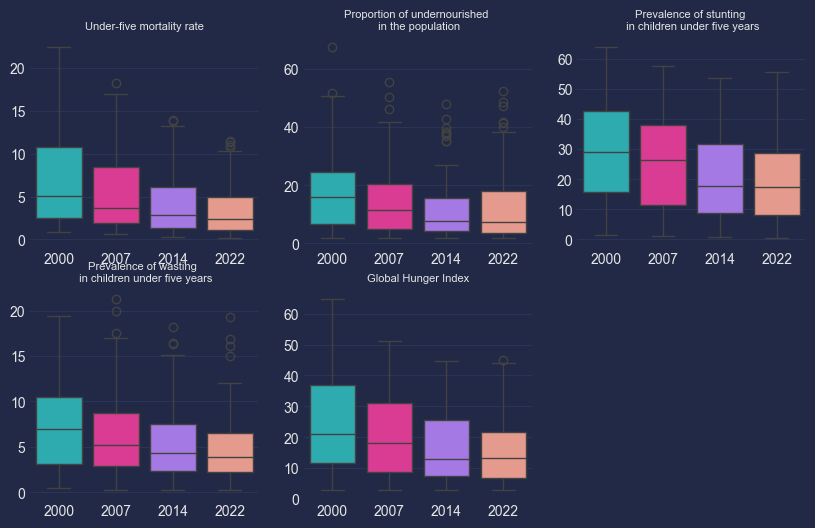

In [182]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
sns.boxplot(df_u5m_rate)
plt.title('Under-five mortality rate',fontsize=8)

plt.subplot(2, 3, 2)
sns.boxplot(df_prop_un)
plt.title('Proportion of undernourished \n in the population',fontsize=8)

plt.subplot(2, 3, 3)
sns.boxplot(df_preva_st_u5)
plt.title('Prevalence of stunting \n in children under five years',fontsize=8)

plt.subplot(2, 3, 4)
sns.boxplot(df_preva_wa_u5)
plt.title('Prevalence of wasting \n in children under five years',fontsize=8)

plt.subplot(2, 3, 5)
sns.boxplot(df_GHI2022.iloc[:,1:5])
plt.title('Global Hunger Index',fontsize=8)

plt.show()

In [183]:
col=['2000','2007','2014','2022']

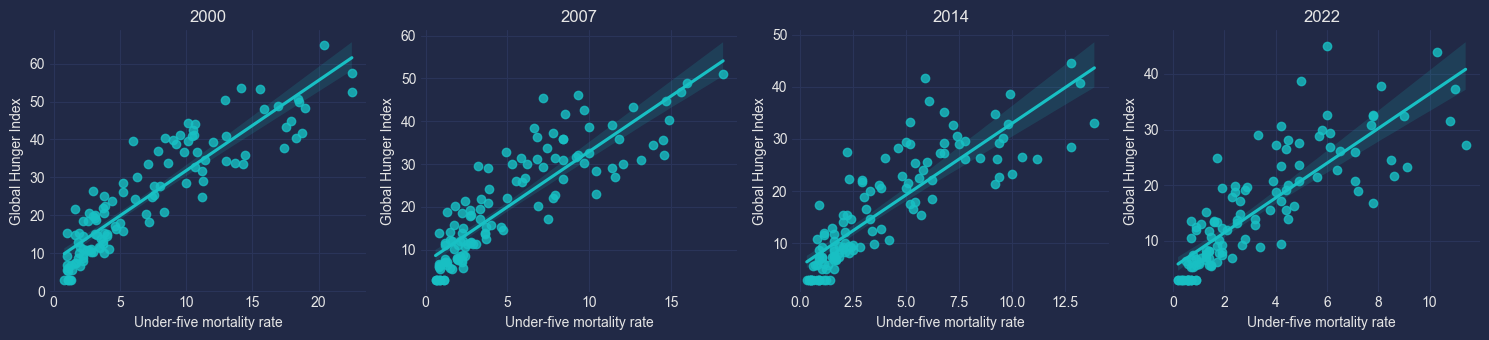

In [184]:
fig = plt.figure(figsize=(15,3.5))

for i in range(len(col)):
    plt.subplot(1,4,i+1)
    sns.regplot(x=df_u5m_rate[col[i]],y=df_GHI2022[col[i]])
    plt.xlabel('Under-five mortality rate') 
    plt.ylabel('Global Hunger Index') 
    plt.title(col[i],fontsize=12)
    
plt.tight_layout()
plt.show()

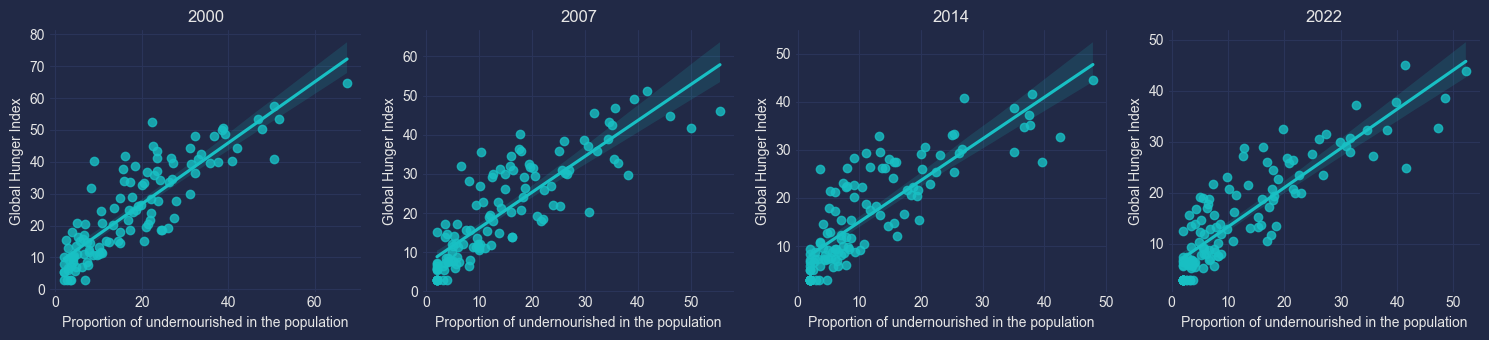

In [185]:
fig = plt.figure(figsize=(15,3.5))

for i in range(len(col)):
    plt.subplot(1,4,i+1)
    sns.regplot(x=df_prop_un[col[i]],y=df_GHI2022[col[i]])
    plt.xlabel('Proportion of undernourished in the population') 
    plt.ylabel('Global Hunger Index') 
    plt.title(col[i],fontsize=12)
    
plt.tight_layout()
plt.show()

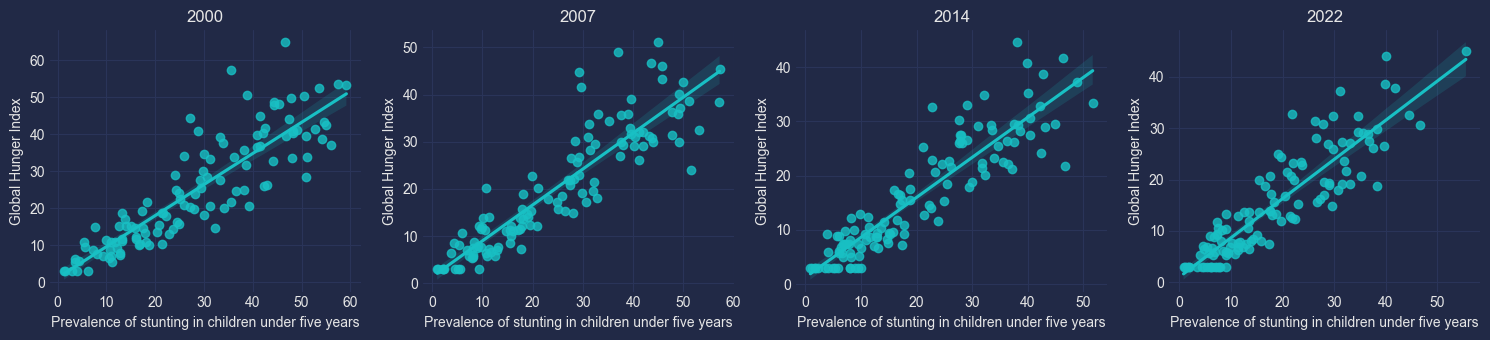

In [186]:
fig = plt.figure(figsize=(15,3.5))

for i in range(len(col)):
    plt.subplot(1,4,i+1)
    sns.regplot(x=df_preva_st_u5[col[i]],y=df_GHI2022[col[i]])
    plt.xlabel('Prevalence of stunting in children under five years') 
    plt.ylabel('Global Hunger Index') 
    plt.title(col[i],fontsize=12)
    
plt.tight_layout()
plt.show()

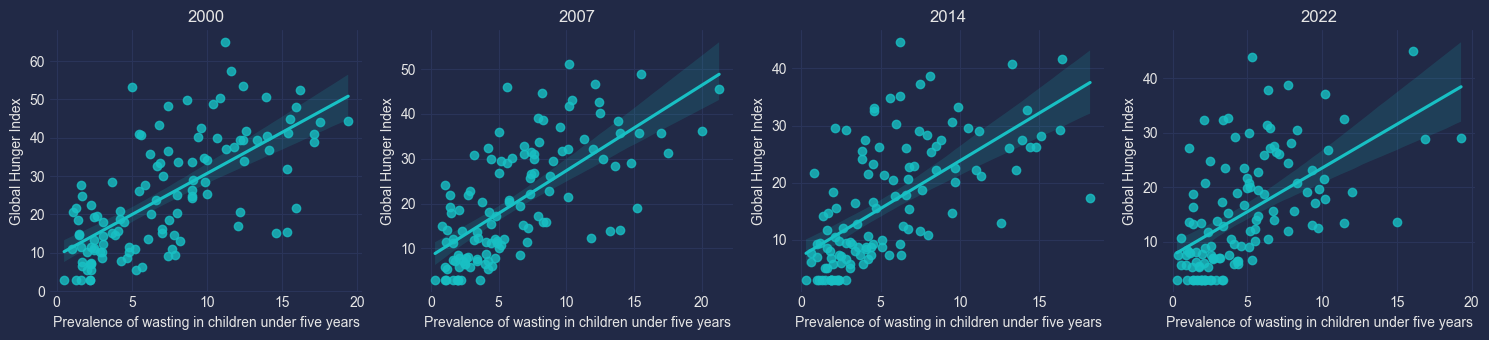

In [187]:
fig = plt.figure(figsize=(15,3.5))

for i in range(len(col)):
    plt.subplot(1,4,i+1)
    sns.regplot(x=df_preva_wa_u5[col[i]],y=df_GHI2022[col[i]])
    plt.xlabel('Prevalence of wasting in children under five years') 
    plt.ylabel('Global Hunger Index') 
    plt.title(col[i],fontsize=12)
    
plt.tight_layout()
plt.show()

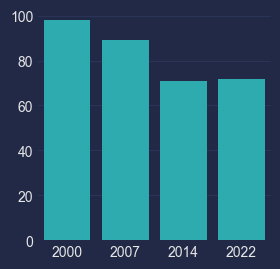

In [188]:
fig = plt.figure(figsize=(3,3))
y1=df_GHI2022[df_GHI2022['2000']>=10].sort_values('2000', ascending=False)['Country'].count()
y2=df_GHI2022[df_GHI2022['2007']>=10].sort_values('2007', ascending=False)['Country'].count()
y3=df_GHI2022[df_GHI2022['2014']>=10].sort_values('2014', ascending=False)['Country'].count()
y4=df_GHI2022[df_GHI2022['2022']>=10].sort_values('2022', ascending=False)['Country'].count()

x=[2000,2007,2014,2022]
y=[y1,y2,y3,y4]

sns.barplot(x=x,y=y)
plt.show()

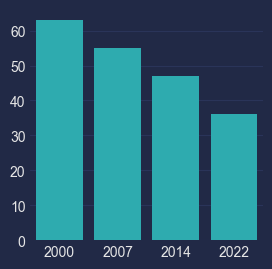

In [189]:
fig = plt.figure(figsize=(3,3))
y1=df_GHI2022[df_GHI2022['2000']>=20].sort_values('2000', ascending=False)['Country'].count()
y2=df_GHI2022[df_GHI2022['2007']>=20].sort_values('2007', ascending=False)['Country'].count()
y3=df_GHI2022[df_GHI2022['2014']>=20].sort_values('2014', ascending=False)['Country'].count()
y4=df_GHI2022[df_GHI2022['2022']>=20].sort_values('2022', ascending=False)['Country'].count()

x=[2000,2007,2014,2022]
y=[y1,y2,y3,y4]

sns.barplot(x=x,y=y)
plt.show()

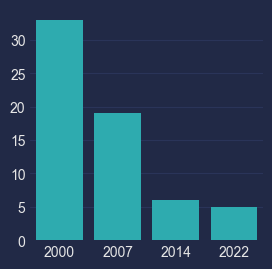

In [190]:
fig = plt.figure(figsize=(3,3))
y1=df_GHI2022[df_GHI2022['2000']>=35].sort_values('2000', ascending=False)['Country'].count()
y2=df_GHI2022[df_GHI2022['2007']>=35].sort_values('2007', ascending=False)['Country'].count()
y3=df_GHI2022[df_GHI2022['2014']>=35].sort_values('2014', ascending=False)['Country'].count()
y4=df_GHI2022[df_GHI2022['2022']>=35].sort_values('2022', ascending=False)['Country'].count()

x=[2000,2007,2014,2022]
y=[y1,y2,y3,y4]

sns.barplot(x=x,y=y)
plt.show()

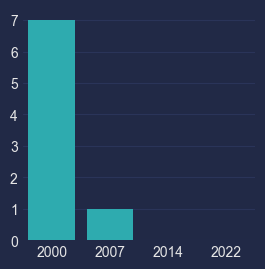

In [191]:
fig = plt.figure(figsize=(3,3))
y1=df_GHI2022[df_GHI2022['2000']>=50].sort_values('2000', ascending=False)['Country'].count()
y2=df_GHI2022[df_GHI2022['2007']>=50].sort_values('2007', ascending=False)['Country'].count()
y3=df_GHI2022[df_GHI2022['2014']>=50].sort_values('2014', ascending=False)['Country'].count()
y4=df_GHI2022[df_GHI2022['2022']>=50].sort_values('2022', ascending=False)['Country'].count()

x=[2000,2007,2014,2022]
y=[y1,y2,y3,y4]

sns.barplot(x=x,y=y)
plt.show()

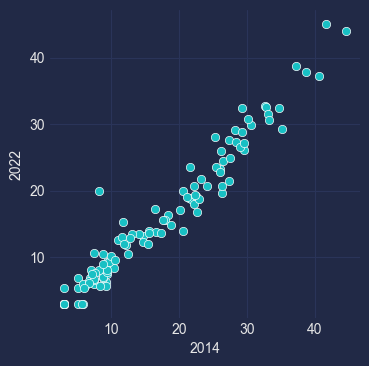

In [192]:
fig = plt.figure(figsize=(4,4))
sns.scatterplot(x=df_GHI2022['2014'],y=df_GHI2022['2022'])

plt.show()

TypeError: Could not convert ["AfghanistanAlbaniaAlgeriaAngolaArgentinaArmeniaAzerbaijanBahrainBangladeshBelarusBeninBhutanBolivia (Plurinat. State of)Bosnia & HerzegovinaBotswanaBrazilBulgariaBurkina FasoBurundiCabo VerdeCambodiaCameroonCentral African RepublicChadChileChinaColombiaComorosCongo (Republic of)Costa RicaCôte d'IvoireCroatiaDem. Rep. of the CongoDjiboutiDominican RepublicEcuadorEgyptEl SalvadorEquatorial GuineaEritreaEstoniaEswatiniEthiopiaFijiGabonGambiaGeorgiaGhanaGuatemalaGuineaGuinea-BissauGuyanaHaitiHondurasHungaryIndiaIndonesiaIran (Islamic Republic of)IraqJamaicaJordanKazakhstanKenyaKorea (DPR)KuwaitKyrgyzstanLao PDRLatviaLebanonLesothoLiberiaLibyaLithuaniaMadagascarMalawiMalaysiaMaldivesMaliMauritaniaMauritiusMexicoMoldova (Rep. of)MongoliaMontenegroMoroccoMozambiqueMyanmarNamibiaNepalNicaraguaNigerNigeriaNorth MacedoniaOmanPakistanPanamaPapua New GuineaParaguayPeruPhilippinesQatarRomaniaRussian FederationRwandaSaudi ArabiaSenegalSerbiaSierra LeoneSlovakiaSolomon IslandsSomaliaSouth AfricaSouth SudanSri LankaSudanSurinameSyrian Arab RepublicTajikistanTanzania (United Rep. of)ThailandTimor-LesteTogoTrinidad & TobagoTunisiaTürkiyeTurkmenistanUgandaUkraineUnited Arab EmiratesUruguayUzbekistanVenezuela (Boliv. Rep. of)Viet NamYemenZambiaZimbabwe"] to numeric

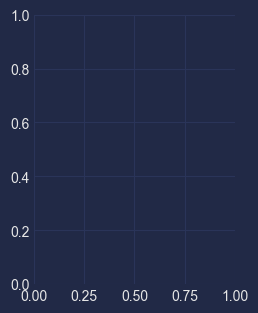

In [194]:
fig = plt.figure(figsize=(15,3.5))

plt.subplot(1, 5, 1)
df_u5m_rate.mean().plot.bar()
plt.title('Under five mortality rate',fontsize=8)

plt.subplot(1, 5, 2)
df_prop_un.mean().plot.bar()
plt.title('Proportion of undernourished \n in the population',fontsize=8)

plt.subplot(1, 5, 3)
df_preva_st_u5.mean().plot.bar()
plt.title('Prevalence of stunting \n in children under five years',fontsize=8)

plt.subplot(1, 5, 4)
df_preva_wa_u5.mean().plot.bar()
plt.title('Prevalence of wasting \n in children under five years',fontsize=8)

plt.subplot(1, 5, 5)
df_GHI2022.iloc[:,1:5].mean().plot.bar()
plt.title('Global Hunger Index',fontsize=8)

plt.show()

TypeError: Could not convert ["AfghanistanAlbaniaAlgeriaAngolaArgentinaArmeniaAzerbaijanBahrainBangladeshBelarusBeninBhutanBolivia (Plurinat. State of)Bosnia & HerzegovinaBotswanaBrazilBulgariaBurkina FasoBurundiCabo VerdeCambodiaCameroonCentral African RepublicChadChileChinaColombiaComorosCongo (Republic of)Costa RicaCôte d'IvoireCroatiaDem. Rep. of the CongoDjiboutiDominican RepublicEcuadorEgyptEl SalvadorEquatorial GuineaEritreaEstoniaEswatiniEthiopiaFijiGabonGambiaGeorgiaGhanaGuatemalaGuineaGuinea-BissauGuyanaHaitiHondurasHungaryIndiaIndonesiaIran (Islamic Republic of)IraqJamaicaJordanKazakhstanKenyaKorea (DPR)KuwaitKyrgyzstanLao PDRLatviaLebanonLesothoLiberiaLibyaLithuaniaMadagascarMalawiMalaysiaMaldivesMaliMauritaniaMauritiusMexicoMoldova (Rep. of)MongoliaMontenegroMoroccoMozambiqueMyanmarNamibiaNepalNicaraguaNigerNigeriaNorth MacedoniaOmanPakistanPanamaPapua New GuineaParaguayPeruPhilippinesQatarRomaniaRussian FederationRwandaSaudi ArabiaSenegalSerbiaSierra LeoneSlovakiaSolomon IslandsSomaliaSouth AfricaSouth SudanSri LankaSudanSurinameSyrian Arab RepublicTajikistanTanzania (United Rep. of)ThailandTimor-LesteTogoTrinidad & TobagoTunisiaTürkiyeTurkmenistanUgandaUkraineUnited Arab EmiratesUruguayUzbekistanVenezuela (Boliv. Rep. of)Viet NamYemenZambiaZimbabwe"] to numeric

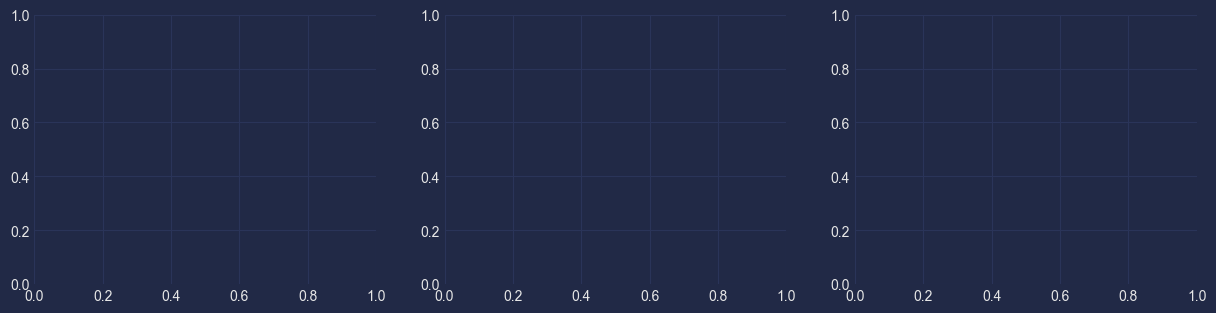

In [222]:
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for data manipulation (assuming you haven't already)

# Assuming your DataFrames (df_u5m_rate, df_prop_un, etc.) are loaded correctly

def create_indicator_plots(dataframes):
    """
    This function creates subplots with bar charts for the mean values of each indicator in the provided DataFrames.

    Args:
        dataframes (list): A list of DataFrames containing the indicators.

    Returns:
        None
    """

    fig, axes = plt.subplots(1, len(dataframes), figsize=(15, 3.5))  # Create figure and subplots

    for i, df in enumerate(dataframes):
        # Check for empty DataFrame
        if df.empty:
            print(f"Skipping plot for {df.columns[0]}: DataFrame is empty.")
            continue

        # Check for non-numeric data (consider handling as needed)
        if not pd.api.types.is_numeric_dtype(df):
            print(f"Warning: {df.columns[0]} might contain non-numeric data. Consider handling it before plotting.")

        axes[i].bar(df.index, df.mean().values)  # Use index for x-axis labels and values for bars
        axes[i].set_title(df.columns[0], fontsize=8)
        axes[i].set_xticks(rotation=90)  # Rotate x-axis labels for readability

    plt.tight_layout()
    plt.show()

# Call the function with your DataFrames
dataframes = [df_u5m_rate, df_prop_un, df_preva_st_u5, df_preva_wa_u5, df_GHI2022]  # Add your remaining DataFrames
create_indicator_plots(dataframes)


In [195]:
df_GHI2022['u5m_rate']=df_u5m_rate['2022']
df_GHI2022['prop_un']=df_prop_un['2022']
df_GHI2022['preva_st_u5']=df_preva_st_u5['2022']
df_GHI2022['preva_wa_u5']=df_preva_wa_u5['2022']

In [196]:
df_clus=df_GHI2022.drop(['2000','2007','2014'],axis=1)
df_clus

Country  2022  Absolute change since 2014  \
0                   Afghanistan  29.9                        -0.7   
1                       Albania   6.2                        -3.0   
2                       Algeria   6.9                        -1.8   
3                        Angola  25.9                        -0.3   
4                     Argentina   6.8                         1.8   
..                          ...   ...                         ...   
131  Venezuela (Boliv. Rep. of)  19.9                        11.8   
132                    Viet Nam  11.9                        -3.5   
133                       Yemen  45.1                         3.4   
134                      Zambia  29.3                        -5.9   
135                    Zimbabwe   NaN                         NaN   

     % change since 2014  u5m_rate  prop_un  preva_st_u5  preva_wa_u5  
0                   -2.3       5.8     29.8         38.2          5.1  
1                  -32.6       1.0      3.9         11.3          1.6  
2                  -20.7       2.3      2.0          9.8          2.7  
3                   -1.1       7.1     20.8         29.8          6.1  
4                   36.0       0.9      3.7         12.3          2.7  
..                   ...       ...      ...          ...          ...  
131                145.7       2.4     22.9         22.2          5.0  
132                -22.7       2.1      5.7         19.6          5.2  
133                  8.2       6.0     41.4         55.5         16.1  
134                -16.8       6.1     30.9         34.6          4.2  
135                  NaN       5.4      NaN         23.5          2.9  

[136 rows x 8 columns]

In [197]:
df_clus=df_clus.dropna()

In [198]:
df_clus2=df_clus.drop('Country',axis=1)

In [199]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc = sc.fit_transform(df_clus2)
df_sc = pd.DataFrame(df_sc, columns=df_clus2.columns)

In [200]:
from sklearn.cluster import KMeans

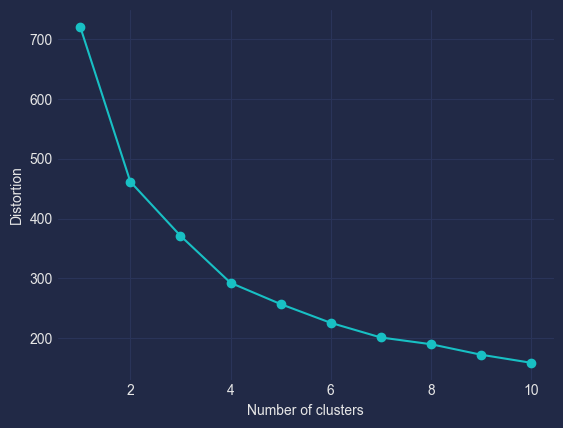

In [201]:
distortions = []

for i  in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_sc)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [202]:
model = KMeans(n_clusters=4, random_state=1)
model.fit(df_sc)

KMeans(n_clusters=4, random_state=1)

In [203]:
cluster = model.labels_

In [204]:
df_clus['Cluster']=cluster

In [205]:
df_clus.groupby('Cluster').mean().style.bar(axis=0)

TypeError: agg function failed [how->mean,dtype->object]

In [206]:
col=['2022', 'Absolute change since 2014', '% change since 2014',
       'u5m_rate', 'prop_un', 'preva_st_u5', 'preva_wa_u5']

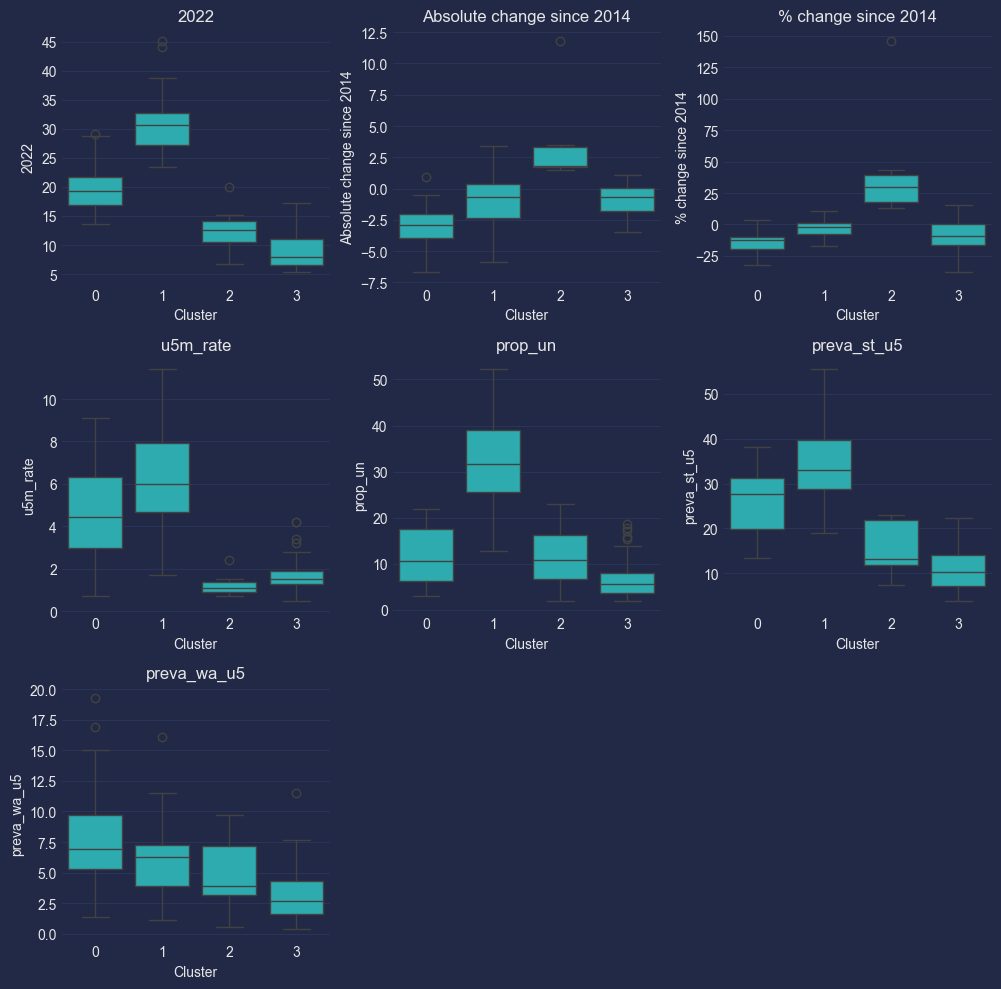

In [207]:
fig = plt.figure(figsize=(10,10))

for i in range(len(col)):
    plt.subplot(3,3,i+1)
    plt.title(col[i])
    sns.boxplot(data=df_clus,y=df_clus[col[i]],x=df_clus['Cluster'])

plt.tight_layout()
plt.show()

In [208]:
col2=['Absolute change since 2014', '% change since 2014',
       'u5m_rate', 'prop_un', 'preva_st_u5', 'preva_wa_u5']

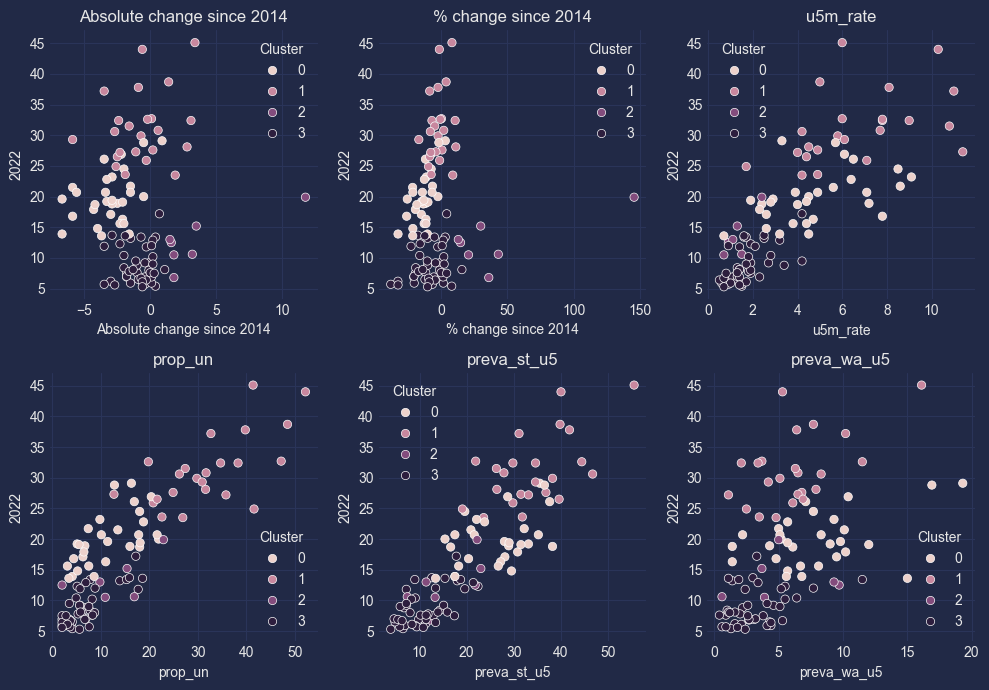

In [209]:
fig = plt.figure(figsize=(10,7))

for i in range(len(col2)):
    plt.subplot(2,3,i+1)
    plt.title(col2[i])
    sns.scatterplot(data=df_clus,x=df_clus[col2[i]],y=df_clus['2022'],hue=df_clus['Cluster'])

plt.tight_layout()
plt.show()

In [210]:
df_clus[df_clus['Cluster']==0].sort_values('2022',ascending=False)

Country  2022  Absolute change since 2014  % change since 2014  \
55             India  29.1                         0.9                  3.2   
114            Sudan  28.8                        -0.5                 -1.7   
27           Comoros  26.9                        -2.2                 -7.6   
94          Pakistan  26.1                        -3.5                -11.8   
17      Burkina Faso  24.5                        -2.0                 -7.5   
77              Mali  23.2                        -2.9                -11.1   
121             Togo  22.8                        -3.3                -12.6   
10             Benin  21.7                        -1.5                 -6.5   
33          Djibouti  21.5                        -5.9                -21.5   
78        Mauritania  20.7                        -5.6                -21.3   
45            Gambia  20.7                        -1.5                 -6.8   
74            Malawi  20.7                        -3.4                -14.1   
14          Botswana  20.0                        -0.5                 -2.4   
8         Bangladesh  19.6                        -6.7                -25.5   
109  Solomon Islands  19.4                        -2.9                -13.0   
66           Lao PDR  19.2                        -3.3                -14.7   
88             Nepal  19.1                        -2.1                 -9.9   
21          Cameroon  18.9                        -2.5                -11.7   
48         Guatemala  18.8                        -2.9                -13.4   
87           Namibia  18.7                        -4.2                -18.3   
56         Indonesia  17.9                        -4.3                -19.4   
20          Cambodia  17.1                        -3.0                -14.9   
30     Côte d'Ivoire  16.8                        -5.9                -26.0   
41          Eswatini  16.3                        -2.1                -11.4   
86           Myanmar  15.6                        -2.3                -12.8   
105          Senegal  15.6                        -2.0                -11.4   
99       Philippines  14.8                        -4.0                -21.3   
47             Ghana  13.9                        -1.6                -10.3   
117       Tajikistan  13.9                        -6.7                -32.5   
113        Sri Lanka  13.6                        -3.7                -21.4   

     u5m_rate  prop_un  preva_st_u5  preva_wa_u5  Cluster  
55        3.3     16.3         35.5         19.3        0  
114       5.7     12.8         36.5         16.9        0  
27        6.1     20.4         28.7         10.4        0  
94        6.5     16.9         37.6          7.1        0  
17        8.5     18.0         19.6          7.7        0  
77        9.1      9.8         22.1          9.3        0  
121       6.4     18.8         23.8          5.7        0  
10        8.6      7.4         32.2          5.0        0  
33        5.6     13.5         20.9         10.1        0  
78        7.1     10.1         21.6          8.3        0  
45        4.9     21.6         17.5          5.1        0  
74        3.9     17.8         35.2          2.2        0  
14        4.5     21.9         15.4          5.2        0  
8         2.9     11.4         28.0          9.8        0  
109       1.9     18.1         29.0          5.7        0  
66        4.4      5.1         33.1          9.0        0  
88        2.8      5.5         31.5         12.0        0  
21        7.2      6.7         28.9          4.3        0  
48        2.4     16.0         38.2          1.4        0  
87        4.0     18.0         16.6          6.1        0  
56        2.3      6.5         30.8         10.2        0  
20        2.6      6.3         28.1          9.5        0  
30        7.8      4.4         20.4          4.8        0  
41        4.7     11.0         27.2          1.4        0  
86        4.4      3.1         26.7          6.7        0  
105

In [212]:
df_clus[df_clus['Cluster']==3]


Country  2022  Absolute change since 2014  \
1                         Albania   6.2                        -3.0   
2                         Algeria   6.9                        -1.8   
5                         Armenia   6.9                        -0.4   
6                      Azerbaijan   7.5                        -1.8   
12   Bolivia (Plurinat. State of)  13.2                        -1.5   
15                         Brazil   5.4                         0.4   
16                       Bulgaria   5.9                        -1.5   
19                     Cabo Verde  11.8                        -0.3   
26                       Colombia   7.6                        -1.0   
34             Dominican Republic   8.8                        -1.0   
36                          Egypt  12.3                        -2.3   
37                    El Salvador   8.4                        -2.0   
43                           Fiji   9.2                        -0.1   
44                          Gabon  17.2                         0.7   
46                        Georgia   5.7                        -0.4   
51                         Guyana  10.4                        -2.0   
53                       Honduras  13.4                        -0.7   
57     Iran (Islamic Republic of)   6.5                        -0.9   
58                           Iraq  13.7                        -2.9   
59                        Jamaica   7.0                        -1.8   
61                     Kazakhstan   5.9                         0.1   
65                     Kyrgyzstan   7.8                        -1.6   
79                      Mauritius  13.4                         0.4   
80                         Mexico   8.1                         1.1   
81              Moldova (Rep. of)   6.9                         0.1   
82                       Mongolia   5.7                        -3.5   
84                        Morocco   9.2                        -0.4   
89                      Nicaragua  13.6                        -1.9   
95                         Panama   8.1                        -1.3   
97                       Paraguay   8.0                        -0.1   
98                           Peru   7.6                         0.0   
102            Russian Federation   6.4                        -0.3   
104                  Saudi Arabia   6.7                        -0.7   
111                  South Africa  12.9                         0.2   
115                      Suriname  10.2                         0.2   
119                      Thailand  12.0                         0.1   
122             Trinidad & Tobago   9.0                         0.2   
123                       Tunisia   6.1                        -0.6   
125                  Turkmenistan   9.5                        -1.1   
127                       Ukraine   7.5                         0.3   
128          United Arab Emirates   5.3                        -0.6   
130                    Uzbekistan   5.6                        -2.7   
132                      Viet Nam  11.9                        -3.5   

     % change since 2014  u5m_rate  prop_un  preva_st_u5  preva_wa_u5  Cluster  
1                  -32.6       1.0      3.9         11.3          1.6        3  
2                  -20.7       2.3      2.0          9.8          2.7        3  
5                   -5.5       1.1      3.5         11.4          3.1        3  
6                  -19.4       1.9      2.0         12.9          3.8        3  
12                 -10.2       2.5     13.9         18.0          1.4        3  
15                   8.0       1.5      4.1          6.5          1.3        3  
16                 -20.3       0.6      3.0          6.9          4.4        3  
19                  -2.5       1.4     17.7          7.2          2.4        3  
26                 -11.6       1.3      8.2         10.2          0.9        3  
34                 -10.2       3.4      6.7          6.7          2.2        3  
36        

In [213]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1)
pca.fit(df_sc)
feature = pca.transform(df_sc)

In [214]:
df_clus['PCA1']=feature[:,0]
df_clus['PCA2']=feature[:,1]

In [215]:
df_clus.groupby('Cluster')['PCA1','PCA2'].mean().T.style.bar(axis=1)

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [216]:
pd.DataFrame(pca.components_,columns=df_sc.columns,index=['PCA1','PCA2'])

2022  Absolute change since 2014  % change since 2014  u5m_rate  \
PCA1  0.539467                   -0.002576             0.059686  0.444591   
PCA2  0.009069                    0.693594             0.682092 -0.127001   

       prop_un  preva_st_u5  preva_wa_u5  
PCA1  0.440633     0.480988     0.286773  
PCA2  0.157306    -0.061416    -0.094597

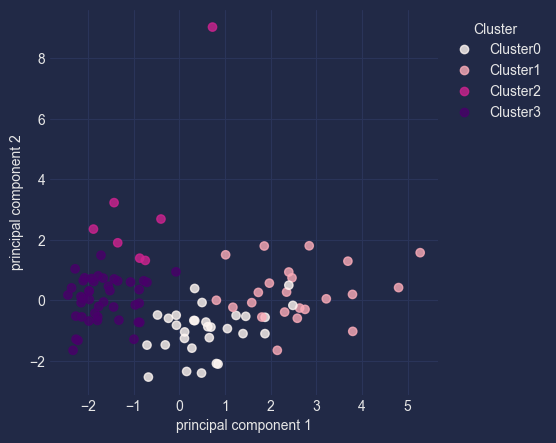

In [217]:
fig=plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

scatter=ax.scatter(df_clus['PCA1'], df_clus['PCA2'],alpha=0.8, c=cluster)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster0','Cluster1','Cluster2','Cluster3'],
           title="Cluster",loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [218]:
df_GHI2022[df_GHI2022['2022']>=35].sort_values('2022', ascending=False).head(3)

Country  2000  2007  2014  2022  \
133                     Yemen  41.3  38.4  41.7  45.1   
22   Central African Republic  48.8  46.8  44.6  44.0   
73                 Madagascar  42.5  37.2  37.3  38.7   

     Absolute change since 2014  % change since 2014  u5m_rate  prop_un  \
133                         3.4                  8.2       6.0     41.4   
22                         -0.6                 -1.3      10.3     52.2   
73                          1.4                  3.8       5.0     48.5   

     preva_st_u5  preva_wa_u5  
133         55.5         16.1  
22          40.0          5.3  
73          39.8          7.7